<a href="https://colab.research.google.com/github/seanrote/neural_networks/blob/master/stockprediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
from tensorflow.keras.layers import Dense, Flatten, Input, SimpleRNN, GRU, LSTM, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [4]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [5]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [7]:
#wrong way first, trying to predict the price itself
series = df['close'].values.reshape(-1, 1)


In [10]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [12]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t + T]
  X.append(x)
  y = series[t + T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)

In [13]:
#auto regresesive model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.1)
)

In [14]:
#train
r = model.fit(X[:-N //2], Y[:-N // 2],
              epochs = 80,
              validation_data = [X[-N//2:], Y[-N // 2:]])

Epoch 1/80
20/20 [==============================] - 8s 29ms/step - loss: 0.2741 - val_loss: 0.1106
Epoch 2/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0162 - val_loss: 0.0352
Epoch 3/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 0.0356
Epoch 4/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0063 - val_loss: 0.0272
Epoch 5/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0060 - val_loss: 0.0290
Epoch 6/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0054 - val_loss: 0.0228
Epoch 7/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0057 - val_loss: 0.0248
Epoch 8/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0063 - val_loss: 0.0194
Epoch 9/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0066 - val_loss: 0.0193
Epoch 10/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0071 - val_loss: 0.0247
Epoch 11/80
20/20 

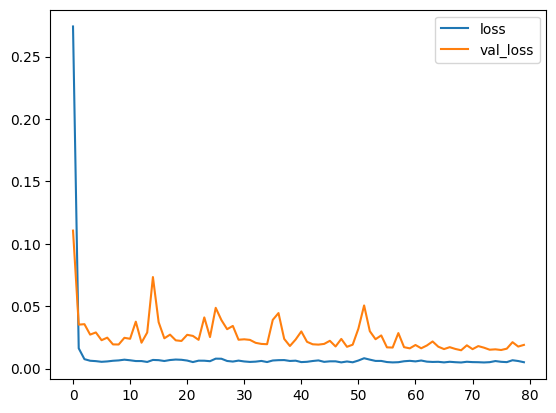

In [15]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

40/40 [==============================] - 1s 4ms/step
(1249, 1)


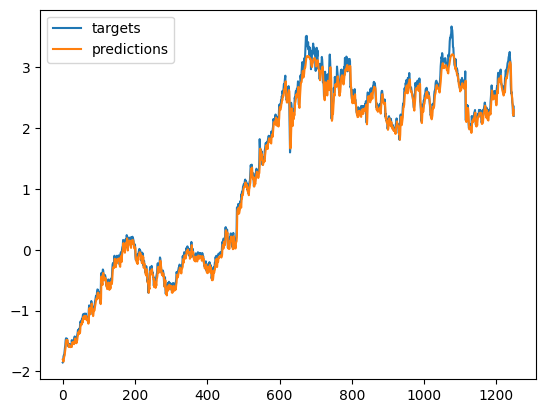

In [16]:
# one step forecast
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label= 'predictions')
plt.legend()

In [17]:
#multi step forecast fails, next model try
#calculating returns by first shifting data

df['PrevClose'] = df['close'].shift(1) #moving everything up 1

In [18]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [21]:
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']

In [22]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


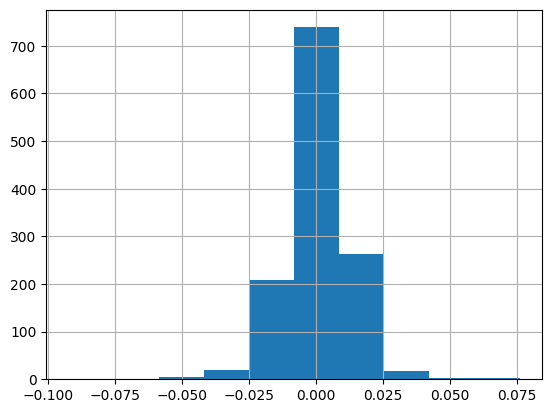

In [23]:
series = df["Return"].hist()

In [24]:
series = df['Return'].values[1:].reshape(-1, 1)

scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [25]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t + T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)


In [26]:
#model

i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate = 0.01)
)

In [27]:
r = model.fit(
    X[:N // 2], Y[:-N // 2],
    epochs = 80,
    validation_data = (X[-N//2:], Y[-N//2:])
)

Epoch 1/80
20/20 [==============================] - 4s 31ms/step - loss: 0.9863 - val_loss: 1.1466
Epoch 2/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9853 - val_loss: 1.1438
Epoch 3/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9833 - val_loss: 1.1435
Epoch 4/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9832 - val_loss: 1.1450
Epoch 5/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9812 - val_loss: 1.1541
Epoch 6/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9856 - val_loss: 1.1494
Epoch 7/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9786 - val_loss: 1.1455
Epoch 8/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9791 - val_loss: 1.1582
Epoch 9/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9772 - val_loss: 1.1500
Epoch 10/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9747 - val_loss: 1.1494
Epoch 11/80
20/20 

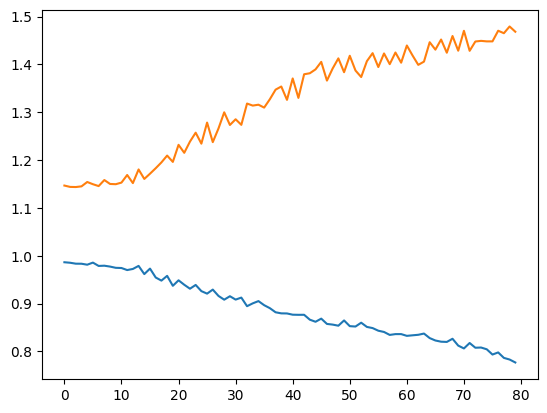

In [28]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

In [29]:
# best model

input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

In [30]:
T = 10
D = input_data.shape[1]
N = len(input_data) - T

In [31]:
#normalizing data
Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T])
input_data = scaler.transform(input_data)

In [32]:
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [33]:
X_test = np.zeros((N - Ntrain, T , D))
Y_test = np.zeros(N - Ntrain)

for u in range(N - Ntrain):
  t = u + Ntrain
  X_test[u, :, :] = input_data[t:t + T]
  Y_test[u] = (targets[t+T] > 0)

In [34]:
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(i, x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

In [35]:
r = model.fit(
    X_train, Y_train,
    batch_size = 32,
    epochs = 300,
    validation_data = (X_test, Y_test)
)

Epoch 1/300
27/27 [==============================] - 3s 23ms/step - loss: 0.6986 - accuracy: 0.5089 - val_loss: 0.6914 - val_accuracy: 0.5024
Epoch 2/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.5280 - val_loss: 0.6940 - val_accuracy: 0.4878
Epoch 3/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5244 - val_loss: 0.6974 - val_accuracy: 0.4878
Epoch 4/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.5173 - val_loss: 0.6910 - val_accuracy: 0.5390
Epoch 5/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6915 - accuracy: 0.5280 - val_loss: 0.6948 - val_accuracy: 0.4951
Epoch 6/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6916 - accuracy: 0.5268 - val_loss: 0.6914 - val_accuracy: 0.5195
Epoch 7/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6908 - accuracy: 0.5244 - val_loss: 0.6931 - val_accuracy: 0.5098
Epoch 8/300


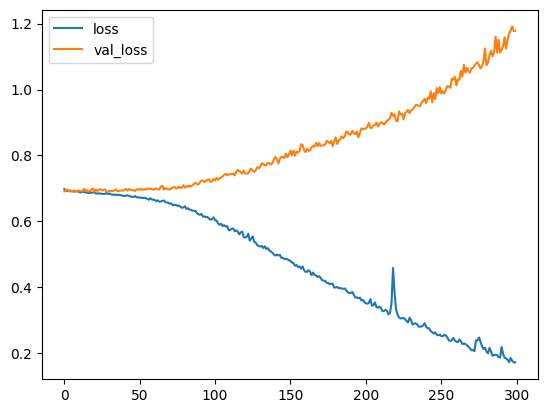

In [36]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

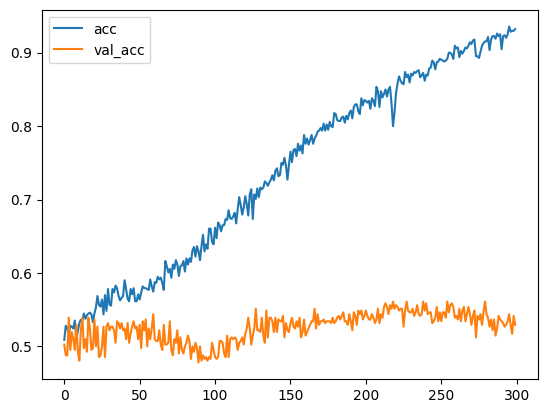

In [39]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

We can see that none of the models are not a very good tool for stock predictions. Many of which claiming to have good model using LSTM are just scamming.